<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab03_Algoritmia_y_graficacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.0 Caos numérico en un mapa logístico y errores de punto flotante (Errores de redondeo)

> Un ejemplo clásico de caos,  es el comportamiento no lineal en las interaciones de un mapa logístico 

\begin{equation}
x_{n+1}=f(x_n)=rx_n(1-x_n)
\end{equation}

> con $x\in (0,1)$ y $r\in(0,4)$ se pueden producir varios comportamientos sorprendentes.

Para este problema, será extremadamente útil  ver sus resultados gráficamente; construya listas de números y llame la libreria matplotlib. 


> ### Problema: 
1. Programar la ecuación para el mapa logístico, y  realizar una grafica del valor de xn como funcion de n.

2. Realizar pruebas para un $x_0=0.5$, con valores de r

```
  r = np.array([1.9, 2.9, 3.1, 3.5, 3.9,4.0])
  numpoints = 100, # Numero sugerido de iteraciones
  x0 = 0.5
```

Organizar las gráficas [multiples plot](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html)



3. Construye una rutina llamada logist_map en que entrada el valor de r, la condiciones inicial xi y el número de puntos determine la evolución en el punto N.  Prueba implementado las siguientes lineas.

```
Np = 1000
xf = np.zeros(Np)
r  = np.linspace(2.5, 4, Np)
 
for i in range(0, Np): 
  xini = np.random.random()
  x_i = logist_map(r = r[i], xi = xini, N = 1000) 
  xf[i] = x_i
```


4. Realiza un gráfico de:
```
  plt.plot((r-1/r), xf,  ".", markersize = 0.5)
```


5. Encontrar dos formas adicionales de expresar $f(x)$, para estos valores funcionales determinar las mismas gráficas del numeral 3 para cada uno de las formas de escribir la expresión. En este caso se espera que los resultados varien. ¿A que se debe esto?. La respuesta no es inmediata, constulta algunas fuentes para sacar tu propia conclusión.



## **Librerías**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**1. Programar la ecuación para el mapa logístico, y realizar una grafica del valor de xn como funcion de n.**

**2. Realizar pruebas para un  x0=0.5 , con valores de r**

In [ ]:
r = np.array([1.9, 2.9, 3.1, 3.5, 3.9, 4.0])   #Se definen los r
N = 100           #Se define el número de iteraciones
x = np.zeros(N)   #Creamos un array de ceros de longitud N
x0 = 0.5          #Definimos un x inicial

x[0] = x0         #Agregamos al array el x inicial

def f(r):                #Función que depende del valor de r (tasa de cambio)
  for i in range(N-1):          #Para recorrer hasta la posición 99 (último término) de la lista x
    x[i+1] = r*x[i]*(1-x[i])    #Cambiamos cada valor de la lista de ceros por el resultado de esto
  return x                      #Retorna la nueva lista x


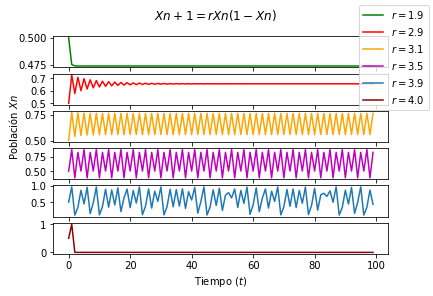

In [ ]:
fig, axs = plt.subplots(6)

axs[0].plot(range(N),f(r[0]),color='g',label="$r=1.9$")
axs[1].plot(range(N),f(r[1]),color='red',label="$r=2.9$")
axs[2].plot(range(N),f(r[2]),color='orange',label="$r=3.1$")
axs[3].plot(range(N),f(r[3]),color='m',label="$r=3.5$")
axs[4].plot(range(N),f(r[4]),label="$r=3.9$")
axs[5].plot(range(N),f(r[5]),color='darkred',label="$r=4.0$")
fig.legend()

fig.suptitle("$Xn+1 = rXn(1-Xn)$")

axs.flat[2].set(ylabel='Población $Xn$')
axs.flat[5].set(xlabel='Tiempo ($t$)')

plt.show()

# **3. Rutina logist_map:**

In [ ]:
Np = 1000
xf = np.zeros(Np)

r  = np.linspace(2.5, 4, Np)

def logist_map(r,xi,N):
  xf[0] = xi
  for i in range(N-1):
    xf[i+1] = r*xf[i]*(1-xf[i])
  return xf[-1]

for i in range(0, Np):
  xini = np.random.random()
  x_i = logist_map(r[i], xi = xini, N = 1000) 
  xf[i] = x_i

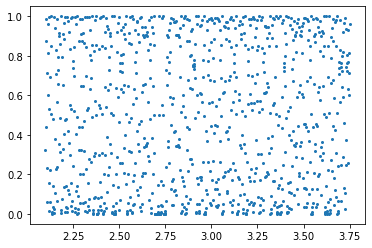

In [ ]:
plt.plot((r-1/r), xf,  ".", markersize = 4)

# **Parte dos**

2.0 El algoritmo de gradiente descendente permite encontrar el minimo de funciones en espacios multidimensionales proponiendo puntos en la direccion en la que el gradiente desciende. Para el caso de una dimensión, podemos encontrar el mínimo realizando iteraciones y multiplicando su derivada en cada nuevo punto por una constante $\alpha$

\begin{equation}
x_{i+1}=x_i - \alpha \frac{\mathrm{d}f}{\mathrm{d}x}(x_i)
\end{equation}




Ejemplo:

Sea $f(\omega) = (\omega-1)^2$ , con $\omega \in \mathbb{R} $. El minimo de esta función esta determinado por
\begin{equation}
\frac{\mathrm{d}f}{\mathrm{d}\omega} = 0
\end{equation}

\begin{equation}
\omega = 1
\end{equation}


Para determinar el minimo,  a través del gradiente descendente puede ser aplicada el siguiente algoritmo:
1. Proponer un número aleatorios inicial $\omega_i$
2. Para descender al mínimo de la función, encontremos un  valor para el cual 
la derivada de la función descenciende, asi:
\begin{equation}
\omega_{i+1} = \omega_{i} - \alpha \frac{\mathrm{d}f(\omega_i)}{\mathrm{d}\omega}
\end{equation}

donde, $\alpha$ es conocido como la tasa de aprendizaje del algoritmo. 

3. Evaluar $f(\omega_{i+1})$

4. Iterar hasta encontrar el minimo de la función 


En el caso de la funcion propuesta, asumiendo un valor de $\alpha=1$, tenemos que:

1. Supongamos que $\omega_{0} = 2$, luego :
2. $\omega_{0+1} = 2 - 1 f'(\omega_{0}) =  = 0$
3. $f(0) = 1$
4. $\omega_{1+1} = 0 - 1 f'(\omega_{1}) = 0-1(2(0-1)) =  2$

El valor del $\omega$  despues de un par de iteraciones, no es el esperado, por que no minimiza la función, se debe proponer un tasa de aprendizaje  **$\alpha$** de tal forma que permita descender suavemente para encontrar el minimo. 



**Su tarea será**:

1. Disenar un programa, en el que entrada la función y su derivada, definidas como funciones lambda de python, se determine el valor mínimo de esa función. 
Prueba tu algoritmo para  la función $f(x) = x^2$

2. Realiza el grafico de la funcion y la derivada, especifica la leyenda de cada curva empleando el metodo legend() de matplotlib.
  

3. Analiza como se minimiza la función, gráficando de la funcion en cada punto a iterar,  como funcion del numero de iteraciones. Para dos valores diferentes de la constante alpha (prueba con $\alpha=0.1$, $\alpha=0.01$)


In [ ]:
intervalo = np.linspace(-20,20,500)
f = lambda x: x**2
d = lambda x: 2*x

w0 = 2
alpha1 = 0.1
alpha2 = 0.01
iteraciones = 30

def minimo(f,d,alpha,w0,iteraciones, contador = 0):
  contador += 1
  w0 = w0 - alpha*d(w0)
  fw = f(w0)
  if contador == iteraciones:
    return fw
  
  elif fw == 0:
    return fw
  else:
    return minimo(f,d,alpha,w0,iteraciones, contador)

print(f'Con alpha = {alpha1} y número de iteraciones = {iteraciones}:\n {minimo(f,d,alpha1,w0,iteraciones=30)}\n')
print(f'Con alpha = {alpha2} y número de iteraciones = {iteraciones}:\n {minimo(f,d,alpha2,w0,iteraciones=30)}')

Con alpha = 0.1 y número de iteraciones = 30:
 6.129982163463559e-06

Con alpha = 0.01 y número de iteraciones = 30:
 1.1902125707684827


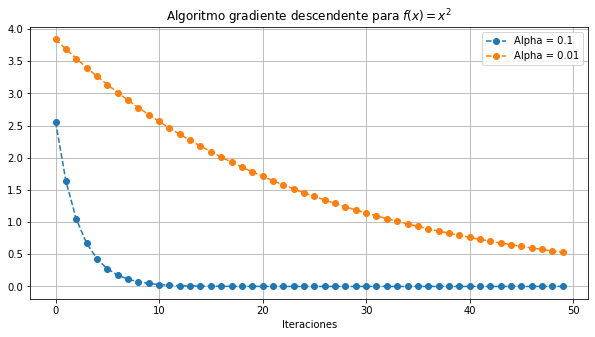

In [ ]:
iteraciones = 50

def minimo_lista(f,d,alpha,w0,iteraciones, contador = 0, L=np.zeros(iteraciones)):
  contador += 1
  w0 = w0 - alpha*d(w0)
  fw = f(w0)

  L[contador-1] = fw
  if contador == iteraciones:
    return L
  
  elif fw == 0:
    return L
  else:
    return minimo_lista(f,d,alpha,w0,iteraciones, contador,L)

plt.figure(figsize=(10,5))
plt.title('Algoritmo gradiente descendente para $f(x) = x^2$')
plt.xlabel('Iteraciones')
plt.plot(range(iteraciones),minimo_lista(f,d,alpha1,w0,iteraciones),'o--',label=f'Alpha = {alpha1}')
plt.plot(range(iteraciones),minimo_lista(f,d,alpha2,w0,iteraciones),'o--',label=f'Alpha = {alpha2}')
plt.grid()

plt.legend()